In [2]:
!pip install -U kaleido 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as pex
import kaleido
from sklearn.preprocessing import LabelEncoder

socio-demographic data, such as age, gender, income, based on which we could know which people to target

In [5]:
# This data contains the details about consumers who purchased an EV
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [9]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [10]:
df.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000


In [10]:
df.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0            Yes         No      

In [11]:
print(pd.isnull(df).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64


In [11]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


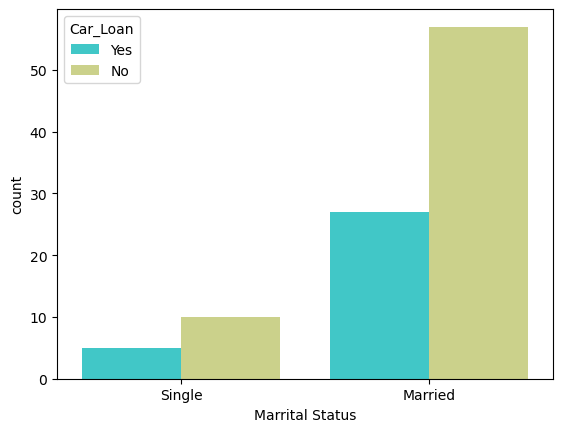

In [13]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df, palette = 'rainbow')
plt.show()

<Axes: title={'center': 'Distribution of Age'}, ylabel='Density'>

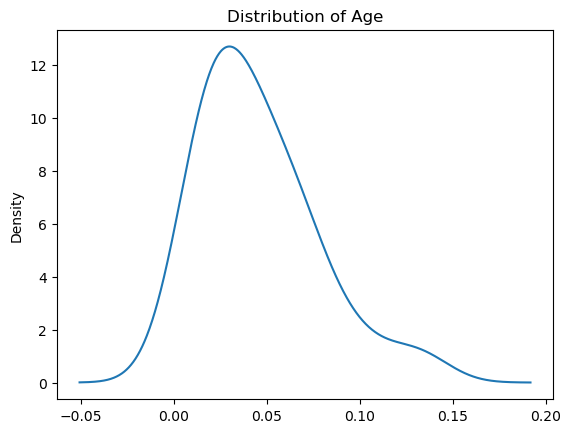

In [5]:
df['Age'].value_counts(normalize=True).plot(kind='kde',title= 'Distribution of Age')

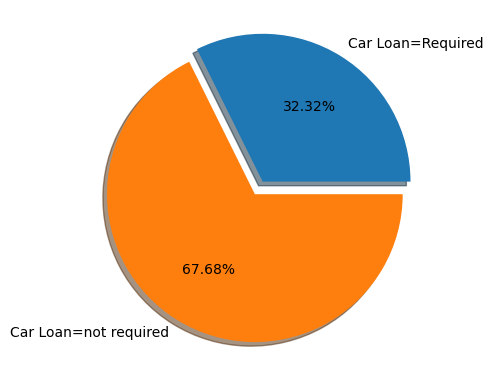

In [28]:
#Getting labels and data
labels = ['Car Loan=Required','Car Loan=not required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette()
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.2f%%')
  
# displaying chart
plt.show()

<Axes: title={'center': 'Distibution of age'}, xlabel='No of Samples'>

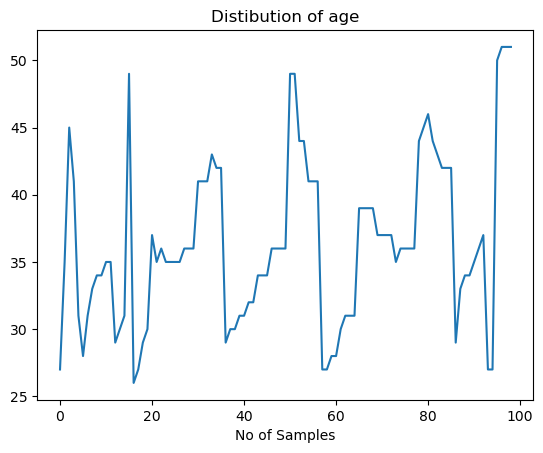

In [6]:
df['Age'].plot(xlabel='No of Samples',y='Age',title='Distibution of age')

<Axes: title={'center': 'Distribution of Salary'}, ylabel='Density'>

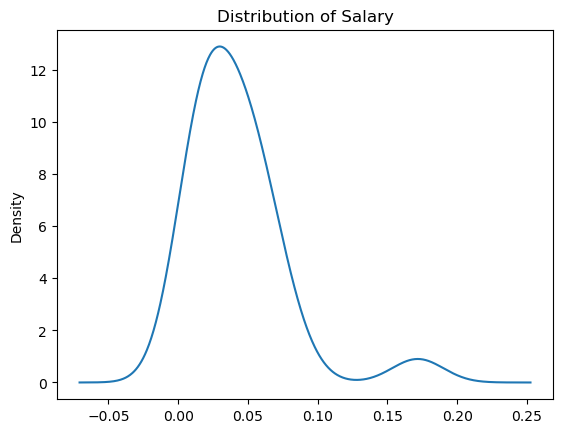

In [7]:
df['Salary'].value_counts(normalize=True).plot(kind='kde',title= 'Distribution of Salary')

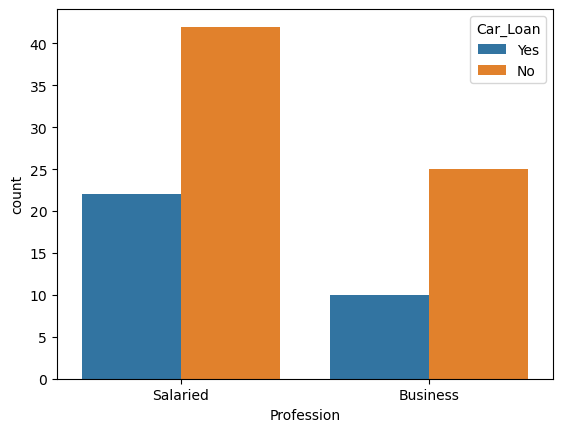

In [14]:
#plt.figure(figsize=(15, 10))
sns.countplot(x='Profession',hue='Car_Loan',data=df)
plt.show()

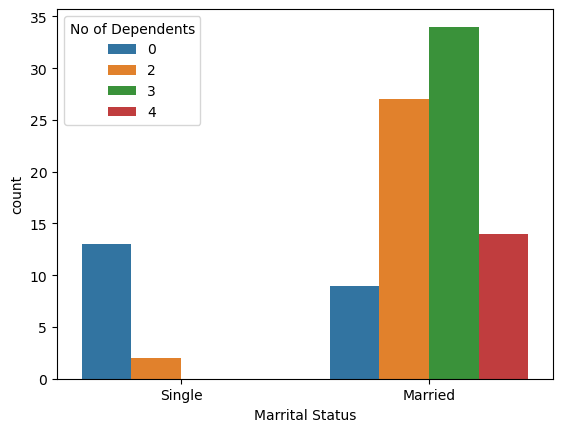

In [8]:
#plt.figure(figsize=(15, 10))
sns.countplot(x='Marrital Status',hue='No of Dependents',data=df)
plt.show()


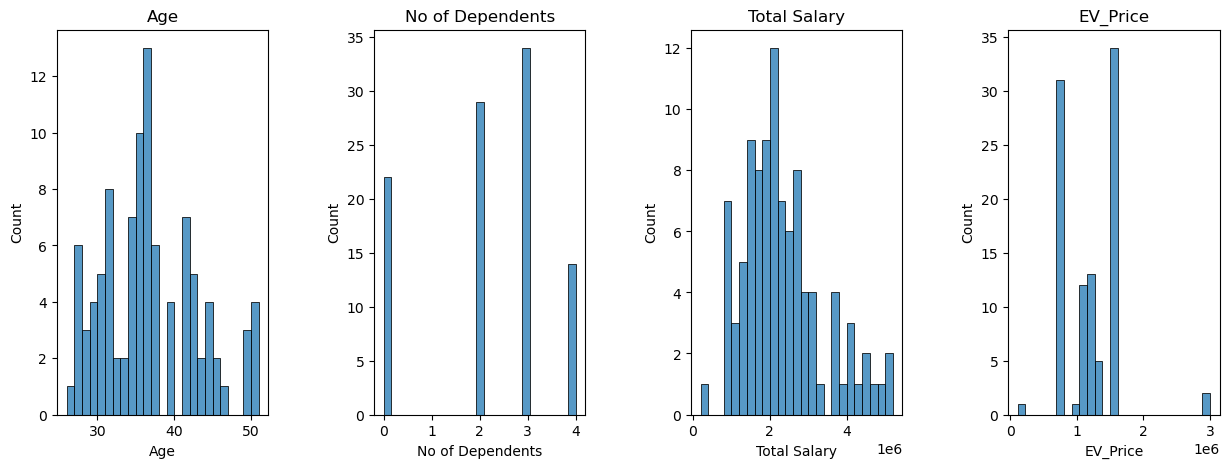

In [30]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

C:\Users\dlmoi\AppData\Local\Temp\ipykernel_30828\1494729937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


<Axes: >

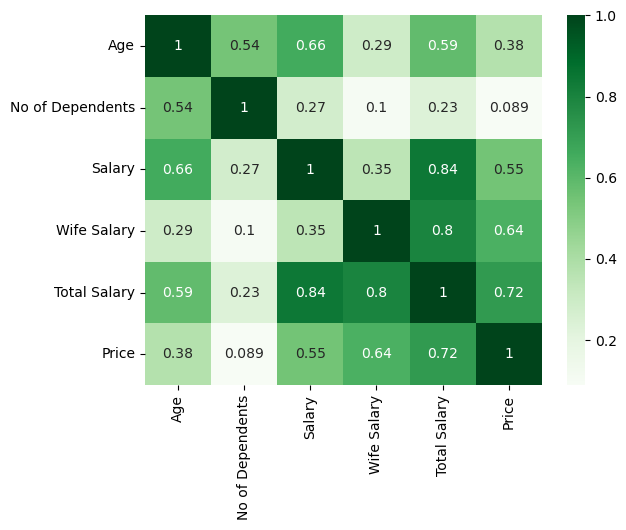

In [12]:
df_corr=df.corr()
sns.heatmap(df_corr,cmap='Greens',annot=True)

In [101]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes 

In [102]:
le = LabelEncoder()
label = le.fit_transform(df['Profession'])
df.drop("Profession", axis=1, inplace=True)
df["Profession"] = label

In [103]:
le = LabelEncoder()
label = le.fit_transform(df['Marrital Status'])
df.drop("Marrital Status", axis=1, inplace=True)
df["Marrital Status"] = label

In [104]:
le = LabelEncoder()
label = le.fit_transform(df['Education'])
df.drop("Education", axis=1, inplace=True)
df["Education"] = label

In [105]:
le = LabelEncoder()
label = le.fit_transform(df['Car_Loan'])
df.drop("Car_Loan", axis=1, inplace=True)
df["Car_Loan"] = label

In [107]:
le = LabelEncoder()
label = le.fit_transform(df['Make'])
df.drop("Make", axis=1, inplace=True)
df["Make"] = label

In [108]:
df.head()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,EV_Price,House Loan,Wife Working,Profession,Marrital Status,Education,Car_Loan,Make
0,27,0,800000,0,800000,800000,0,0,1,1,1,1,8
1,35,2,1400000,600000,2000000,1000000,1,1,1,0,1,1,1
2,45,4,1800000,0,1800000,1200000,1,0,0,0,0,1,4
3,41,3,1600000,600000,2200000,1200000,0,1,0,0,1,0,2
4,31,2,1800000,800000,2600000,1600000,0,1,1,0,1,1,6


In [109]:
cluster_features = list(df.columns)
cluster_df = df[cluster_features].values

In [110]:
cluster_df[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=int64)

In [98]:
cluster_df[:, 0] = cluster_df[:, 0].astype(float)
cluster_df[:, 4] = cluster_df[:, 4].astype(float)
cluster_df[:, 6] = cluster_df[:, 6].astype(float)
cluster_df[:, 7] = cluster_df[:, 7].astype(float)

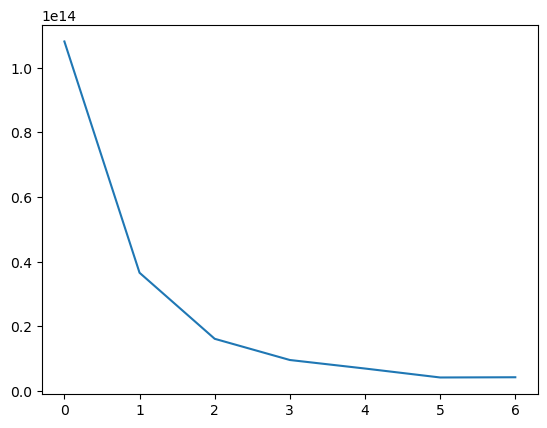

In [111]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_df, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)


In [87]:
print(cost)

[126979657219766.8, 48631727220793.36, 25087750165699.555, 18491805770047.92, 14529036210161.014, 13014466030851.906, 10279541123722.916]


In [112]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_df, categorical=[0])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 28, ncost: 110871456799289.28
Run: 1, iteration: 2/20, moves: 20, ncost: 95948577364685.23
Run: 1, iteration: 3/20, moves: 5, ncost: 94512424166903.9
Run: 1, iteration: 4/20, moves: 4, ncost: 93641851446019.1
Run: 1, iteration: 5/20, moves: 2, ncost: 93221303677728.52
Run: 1, iteration: 6/20, moves: 2, ncost: 93025990364283.92
Run: 1, iteration: 7/20, moves: 0, ncost: 93025990364283.92
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 15, ncost: 93344782683554.7
Run: 2, iteration: 2/20, moves: 4, ncost: 93025990364283.92
Run: 2, iteration: 3/20, moves: 0, ncost: 93025990364283.92
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 23, ncost: 97104646192356.14
Run: 3, iteration: 2/2

In [113]:
# Appending the cluster data

df['Cluster'] = clusters
     

In [115]:
# Average cost of the EV
df.EV_Price.mean()


1194040.4040404041

In [118]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==0].mean()

1638461.5384615385

In [119]:
df['EV_Price'][df.Cluster==1].max()


1600000

In [120]:

# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==1].mean()

1035753.4246575342

In [122]:
df['Cluster'].value_counts(normalize=True) * 100

1    73.737374
0    26.262626
Name: Cluster, dtype: float64

In [123]:

# Segregrating each cluster

Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]

In [124]:

df['Cluster'].value_counts()

1    73
0    26
Name: Cluster, dtype: int64

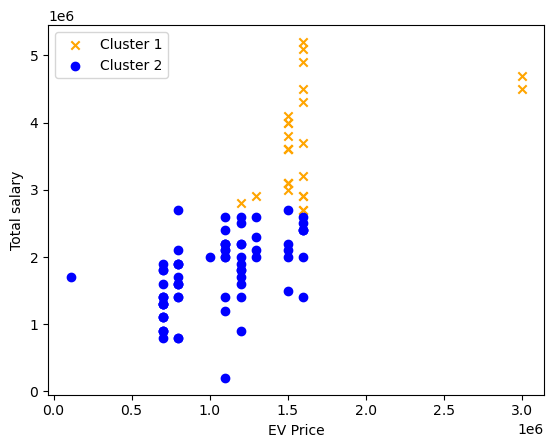

In [126]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='Orange', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='Blue', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

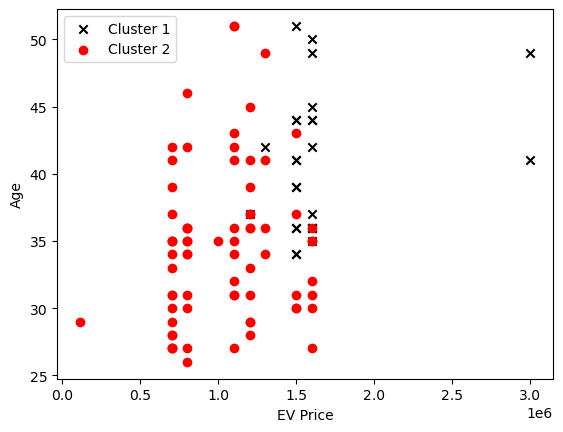

In [128]:

plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='black', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='red', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [129]:
from mpl_toolkits.mplot3d import Axes3D

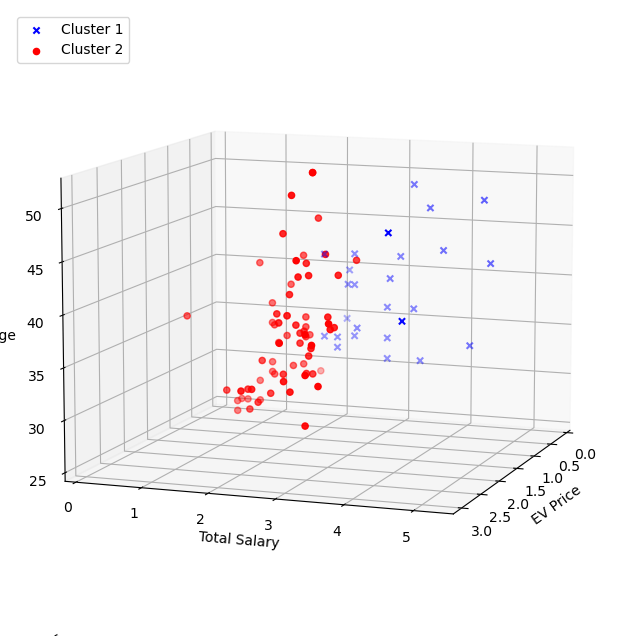

In [131]:

# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='blue', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='red', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

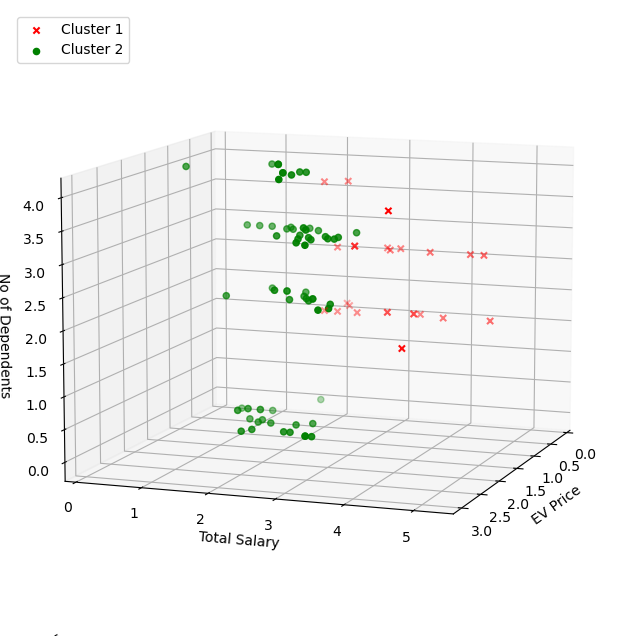

In [132]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()
     

In [133]:
df['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

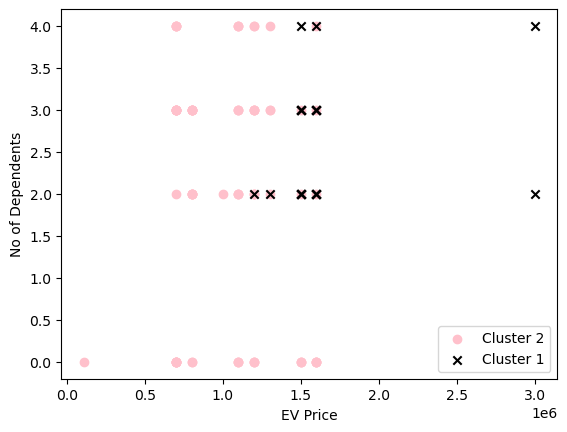

In [137]:

# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='pink', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='black', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

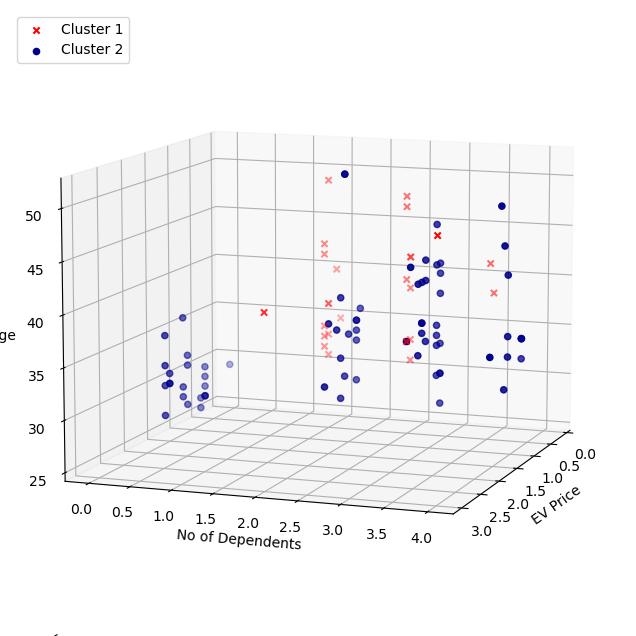

In [141]:

# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],Cluster_1['Age'], color='darkblue', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("No of Dependents")
ax.set_zlabel('Age')
plt.show()
